In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

import pickle

In [3]:
# PGE-CSI-00021 - Chowchilla
dataset = 'PGE-CSI-00114'

data = pd.read_csv('ca_energy_data/Individual Systems Modeled Production/'+dataset+'.csv',
                   names=['LocalTime','kWh'],
                   header=0)

In [4]:
data.shape

(210432, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210432 entries, 0 to 210431
Data columns (total 2 columns):
LocalTime    210432 non-null object
kWh          210432 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.2+ MB


In [6]:
data.head(5)

,LocalTime,kWh
0,01/01/2011 0:00:00,0.0
1,01/01/2011 0:15:00,0.0
2,01/01/2011 0:30:00,0.0
3,01/01/2011 0:45:00,0.0
4,01/01/2011 1:00:00,0.0


In [7]:
data['date_time'] = [dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in data['LocalTime']]
data['date'] = [dt.datetime.strptime(x[0:10], '%m/%d/%Y') for x in data['LocalTime']]
data['year'] = [x.year for x in data['date']]
data['month'] = [x.month for x in data['date']]
data['day'] = [x.day for x in data['date']]
data['time'] = [dt.datetime.strptime(x[11:18], '%H:%M:%S') for x in data['LocalTime']]
data['time'] = [format(x,"%H:%M") for x in data['time']]

In [8]:
data.head(5)

,LocalTime,kWh,date_time,date,year,month,day,time
0,01/01/2011 0:00:00,0.0,2011-01-01 00:00:00,2011-01-01,2011,1,1,00:00
1,01/01/2011 0:15:00,0.0,2011-01-01 00:15:00,2011-01-01,2011,1,1,00:15
2,01/01/2011 0:30:00,0.0,2011-01-01 00:30:00,2011-01-01,2011,1,1,00:30
3,01/01/2011 0:45:00,0.0,2011-01-01 00:45:00,2011-01-01,2011,1,1,00:45
4,01/01/2011 1:00:00,0.0,2011-01-01 01:00:00,2011-01-01,2011,1,1,01:00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210432 entries, 0 to 210431
Data columns (total 8 columns):
LocalTime    210432 non-null object
kWh          210432 non-null float64
date_time    210432 non-null datetime64[ns]
date         210432 non-null datetime64[ns]
year         210432 non-null int64
month        210432 non-null int64
day          210432 non-null int64
time         210432 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 12.8+ MB


In [10]:
with open('pickles/data_'+dataset+'.pickle', 'wb') as to_write:
    pickle.dump(data, to_write)

In [11]:
# daily
data_daily = data.groupby('date')['kWh'].mean()
data_daily

date
2011-01-01    0.096408
2011-01-02    0.043211
2011-01-03    0.649719
2011-01-04    0.770833
2011-01-05    0.165201
                ...   
2016-12-27    0.754116
2016-12-28    0.762768
2016-12-29    0.753552
2016-12-30    0.199563
2016-12-31    0.075545
Name: kWh, Length: 2192, dtype: float64

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


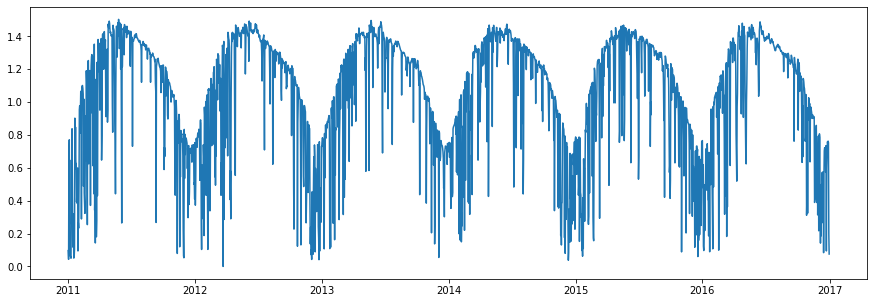

In [12]:
plt.figure(figsize=(15,5))
plt.plot(data_daily.index,data_daily);

In [13]:
# single day
day = '2012-01-01'
data_1day = data[data['date']==day]
data_1day

,LocalTime,kWh,date_time,date,year,month,day,time
35040,01/01/2012 0:00:00,0.0,2012-01-01 00:00:00,2012-01-01,2012,1,1,00:00
35041,01/01/2012 0:15:00,0.0,2012-01-01 00:15:00,2012-01-01,2012,1,1,00:15
35042,01/01/2012 0:30:00,0.0,2012-01-01 00:30:00,2012-01-01,2012,1,1,00:30
35043,01/01/2012 0:45:00,0.0,2012-01-01 00:45:00,2012-01-01,2012,1,1,00:45
35044,01/01/2012 1:00:00,0.0,2012-01-01 01:00:00,2012-01-01,2012,1,1,01:00
...,...,...,...,...,...,...,...,...
35131,01/01/2012 22:45:00,0.0,2012-01-01 22:45:00,2012-01-01,2012,1,1,22:45
35132,01/01/2012 23:00:00,0.0,2012-01-01 23:00:00,2012-01-01,2012,1,1,23:00
35133,01/01/2012 23:15:00,0.0,2012-01-01 23:15:00,2012-01-01,2012,1,1,23:15
35134,01/01/2012 23:30:00,0.0,2012-01-01 23:30:00,2012-01-01,2012,1,1,23:30


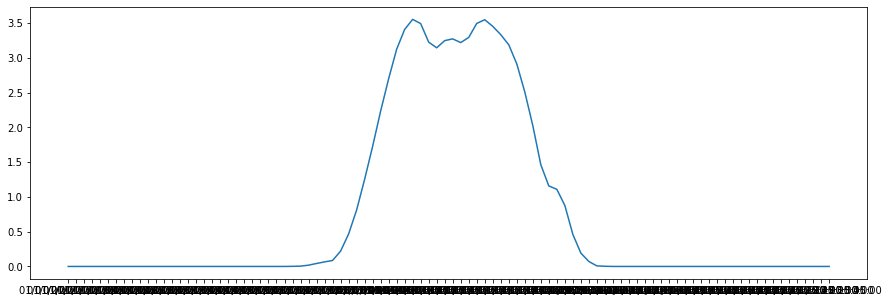

In [14]:
plt.figure(figsize=(15,5))
plt.plot(data_1day['LocalTime'],data_1day['kWh']);

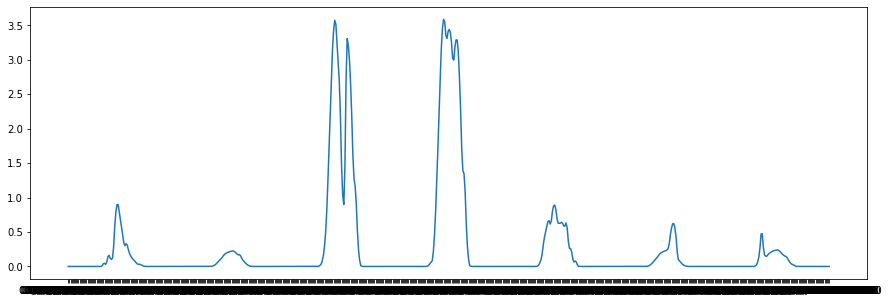

In [15]:
# one week
plt.figure(figsize=(15,5))
plt.plot(data['LocalTime'][0:672],data['kWh'][0:672]);

In [16]:
# one month
month = 1
data_1month = data[data['month']==month]
data_1month

,LocalTime,kWh,date_time,date,year,month,day,time
0,01/01/2011 0:00:00,0.0,2011-01-01 00:00:00,2011-01-01,2011,1,1,00:00
1,01/01/2011 0:15:00,0.0,2011-01-01 00:15:00,2011-01-01,2011,1,1,00:15
2,01/01/2011 0:30:00,0.0,2011-01-01 00:30:00,2011-01-01,2011,1,1,00:30
3,01/01/2011 0:45:00,0.0,2011-01-01 00:45:00,2011-01-01,2011,1,1,00:45
4,01/01/2011 1:00:00,0.0,2011-01-01 01:00:00,2011-01-01,2011,1,1,01:00
...,...,...,...,...,...,...,...,...
178267,01/31/2016 22:45:00,0.0,2016-01-31 22:45:00,2016-01-31,2016,1,31,22:45
178268,01/31/2016 23:00:00,0.0,2016-01-31 23:00:00,2016-01-31,2016,1,31,23:00
178269,01/31/2016 23:15:00,0.0,2016-01-31 23:15:00,2016-01-31,2016,1,31,23:15
178270,01/31/2016 23:30:00,0.0,2016-01-31 23:30:00,2016-01-31,2016,1,31,23:30


In [17]:
data['kWh'].describe()

count    210432.000000
mean          1.050265
std           1.566709
min           0.000000
25%           0.000000
50%           0.001530
75%           2.180623
max           4.988380
Name: kWh, dtype: float64

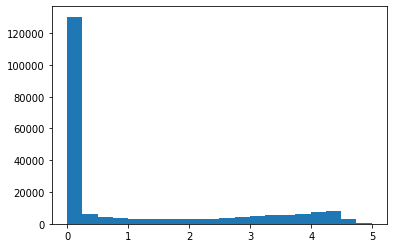

In [18]:
plt.hist(data['kWh'],bins=20);

### More viz

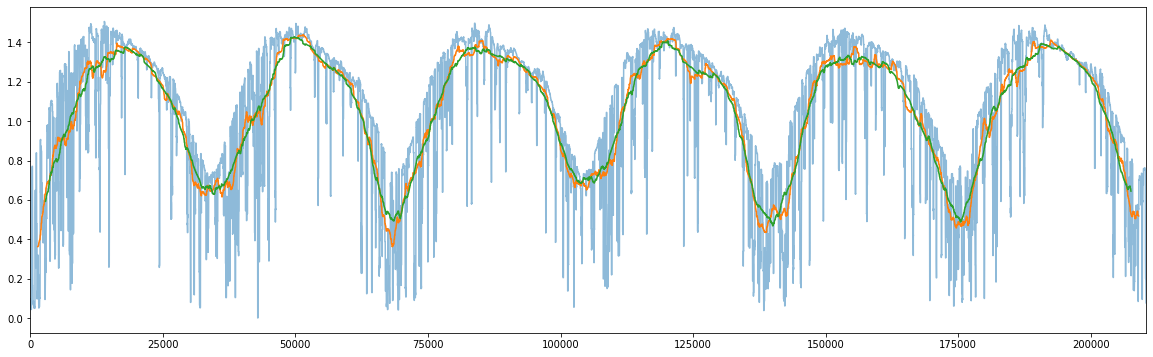

In [19]:
# plot 30-day rolling mean
data['kWh'].rolling(96).mean().plot(figsize=(20,6),alpha=0.5) #daily
data['kWh'].rolling(2880,center=True).mean().plot(figsize=(20,6),alpha=1) #monthly
data['kWh'].rolling(5760,center=True).mean().plot(figsize=(20,6),alpha=1); #2 months
# notice the smoothing

In [20]:
data_daily = pd.DataFrame(data_daily).reset_index()

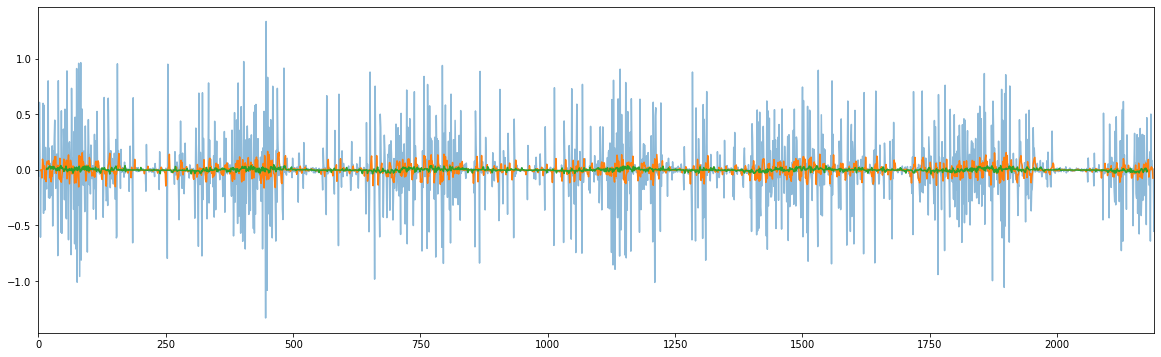

In [21]:
data_daily['Diff'] = data_daily['kWh'].diff(periods=1)
data_daily['Diff'].plot(figsize=(20,6),alpha=0.5)
data_daily['Diff'].rolling(7,center=True).mean().plot(figsize=(20,6),alpha=1); #weekly
data_daily['Diff'].rolling(30,center=True).mean().plot(figsize=(20,6),alpha=1); 

### Plot and visualize data subset

In [22]:
#One year
data_2011 = data[(data['date'] >= '2011-01-01') & (data['date'] <= '2011-12-31')]
data_2011.shape

(35040, 8)

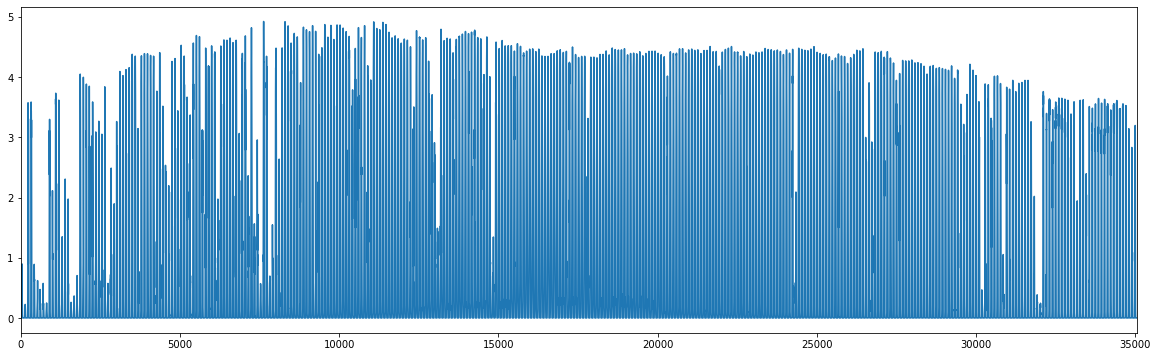

In [23]:

data_2011['kWh'].plot(figsize=(20,6));
# data_2011['kWh'].rolling(30,center=True).mean().plot(figsize=(20,6),alpha=1); #weekly

Daily data Autocorrelation Plots


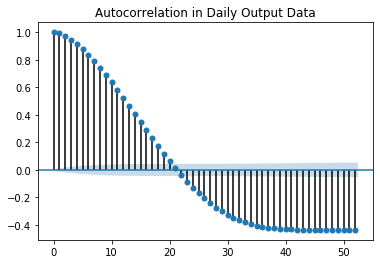

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

print('Daily data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Daily Data
#plot_acf(sales_new['Sales']['Furniture'])
acf_plot = plot_acf(data_2011['kWh'], lags=52, title='Autocorrelation in Daily Output Data')
#plot_acf(sales_new['Sales']['Furniture'])
# pacf_plot = plot_pacf(sales_new['Furniture'], lags=30, title='Partial Autocorrelation in Furniture Daily Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])

In [25]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(data_2011['kWh'])

In [26]:
print(adf)
print(pvalue)
print(usedlag)
print(nobs)

-41.09458074943577
0.0
52
34987


In [27]:
# JULY train: 1-21 test: 22-28
data_july_train = data[(data['date'] >= '2012-07-01') & (data['date'] <= '2012-07-14')]
data_july_test = data[(data['date'] >= '2012-07-15') & (data['date'] <= '2012-07-21')]

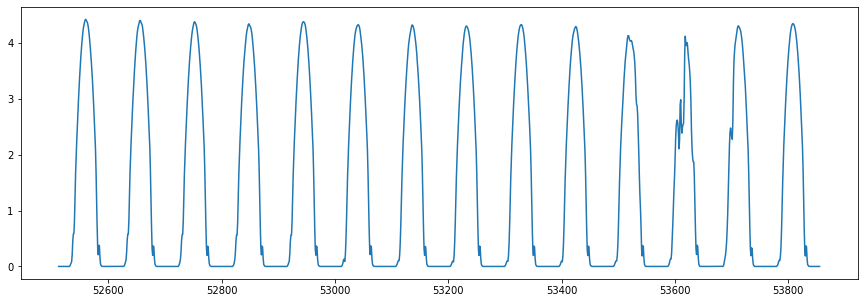

In [28]:
plt.figure(figsize=(15,5))
plt.plot(data_july_train.index,data_july_train['kWh']);

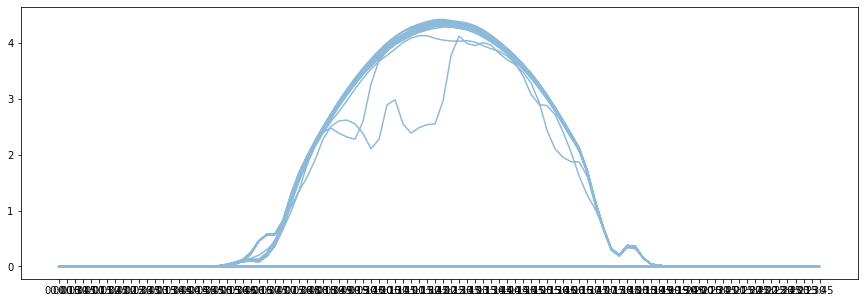

In [29]:
plt.figure(figsize=(15,5))
plt.plot(data_july_train['time'],data_july_train['kWh'],alpha=0.5);

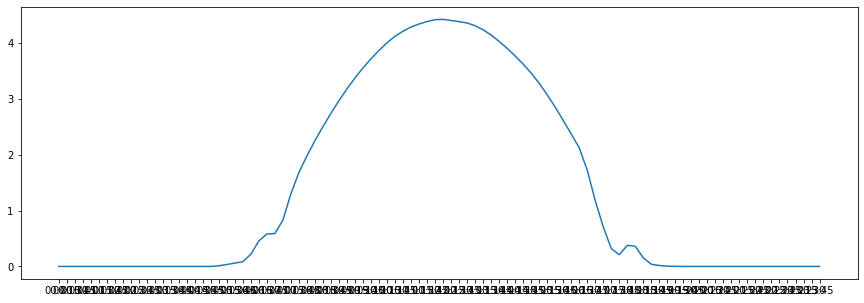

In [30]:
plt.figure(figsize=(15,5))
plt.plot(data_july_train['time'][data_july_train['day']==1],data_july_train['kWh'][data_july_train['day']==1]);

In [31]:
# convert index to datetime
data_july_train.shape

(1344, 8)

### Decompose

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=data_july_train['kWh'], model='additive',freq=50)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

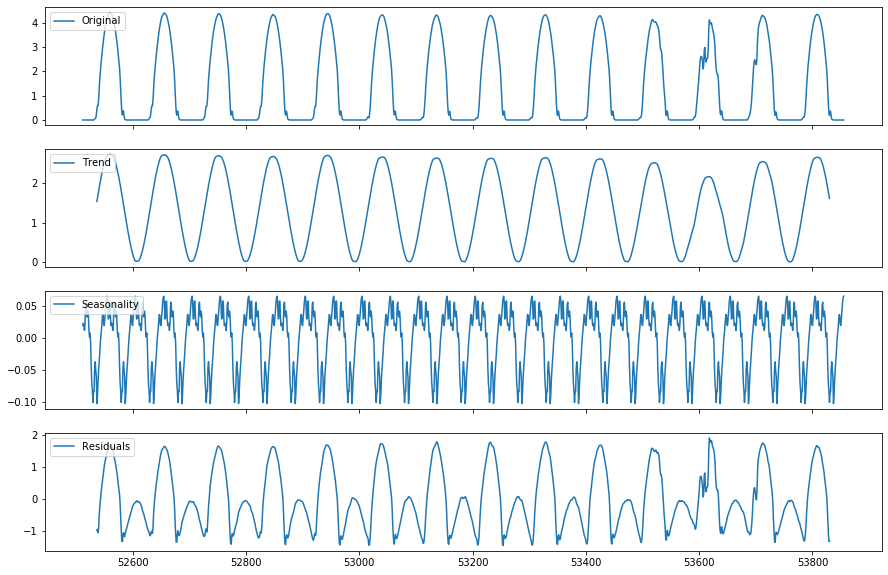

In [33]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(data_july_train['kWh'], label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

### Facebook Prophet

In [34]:
from fbprophet import Prophet

In [35]:
df_fb = data[['LocalTime','kWh']][(data['date'] >= '2012-07-01') & (data['date'] <= '2012-07-28')]
df_fb.columns = ['ds','y']
df_fb.head(5)

,ds,y
52512,07/01/2012 0:00:00,0.0
52513,07/01/2012 0:15:00,0.0
52514,07/01/2012 0:30:00,0.0
52515,07/01/2012 0:45:00,0.0
52516,07/01/2012 1:00:00,0.0


In [36]:
m = Prophet()
m.fit(df_fb)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [37]:
future = m.make_future_dataframe(periods=672,freq='15min')
future.tail()

,ds
3355,2012-08-04 22:45:00
3356,2012-08-04 23:00:00
3357,2012-08-04 23:15:00
3358,2012-08-04 23:30:00
3359,2012-08-04 23:45:00


In [38]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3355,2012-08-04 22:45:00,0.240987,-0.158931,0.608167
3356,2012-08-04 23:00:00,0.209868,-0.138233,0.601956
3357,2012-08-04 23:15:00,0.181817,-0.211622,0.567715
3358,2012-08-04 23:30:00,0.159488,-0.246349,0.566116
3359,2012-08-04 23:45:00,0.144977,-0.212152,0.540061


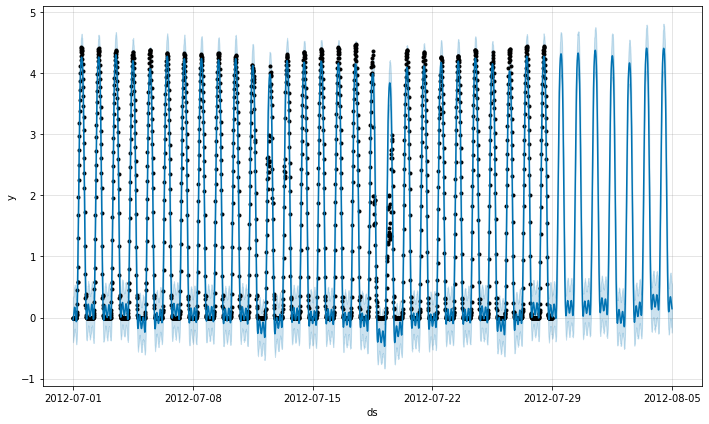

In [39]:
fig1 = m.plot(forecast)

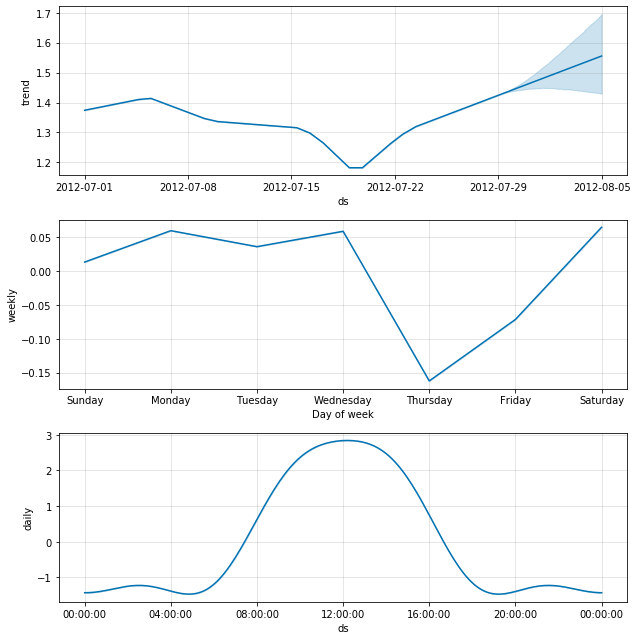

In [40]:
fig2 = m.plot_components(forecast)